# Prepare a Categorical and Numeric Dataset for machine learning
### Topics : Jupyter, Scaling, Encoding

This notebook requires additional Python modules to be imported.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
print('pandas Version:{0}'.format(pd.__version__))
print('Numpy Version :{0}'.format(np.__version__))

pandas Version:1.0.5
Numpy Version :1.19.2


### A Practice dataset that has patterns to be discovered 


Download link: https://gitlab.com/remojo/python/-/tree/master/ml/data/raw


We have a system of automated food generating greenhouse pods that contain animals that are allowed to freely move between them.  Which pod does an animal prefer? What is the high yield fruit for that pod? What does the fan setting change? The pod's solar panels may supply surplus voltage that benefits certain animals or plants.  


The "mix" is one of 4 liquid fertilizer types that were also tested. There will be certain animal or plants that saw a benefit for each. 


Previous research showed that humidity affected one plant negatively, one positively and the rest seemed to have random values. 

Our questions for this example are: What were the most significant events and who benefited the most from a particular mix in each pod? 


The three data files TPS_report[1-3] have different random values, the categorical data is unchanged between them.  Start on one data file and find the optimal model, return here and use the other two sets to see if you get the same answers.


Begin by loading the raw data, create a data frame, the explore the values.

In [ ]:
!cat TPS_report1.csv

In [3]:
tps1_data = pd.read_csv('data/raw/TPS_report1.csv', header=[0])
tps2_data = pd.read_csv('data/raw/TPS_report2.csv', header=[0])
tps3_data = pd.read_csv('data/raw/TPS_report3.csv', header=[0])

In [4]:
tps1_df = pd.DataFrame(tps1_data)
tps2_df = pd.DataFrame(tps2_data)
tps3_df = pd.DataFrame(tps3_data)

In [ ]:
print(tps1_df.head())
print(tps2_df.head())
print(tps3_df.head())
#all header rows and data should be filled for each file, we will work on one at a time

#### Examine the descriptive statistics for the first data set


The columns for mixes and humidity contain continous values, voltage is an integer but should be considered a category because there is only 3 values (0, 3.4, and 5.1) and should be encoded with the other text values.




In [ ]:
print(len(tps1_df.index))
print(len(tps2_df.index))
print(len(tps3_df.index))

In [ ]:
tps1_df.info()

In [ ]:
mixA_mean = tps1_df['mix_a'].mean()
mixA_max = tps1_df['mix_a'].max()
mixA_min = tps1_df['mix_a'].min()
mixA_median = tps1_df['mix_a'].median()

print('Mix A Mean: ', mixA_mean)
print('Mix A Max: ', mixA_max)
print('Mix A Min: ', mixA_min)
print('Mix A median: ', mixA_median)

In [ ]:
mixB_mean = tps1_df['mix_b'].mean()
mixB_max = tps1_df['mix_b'].max()
mixB_min = tps1_df['mix_b'].min()
mixB_median = tps1_df['mix_b'].median()

print('Mix B Mean: ', mixB_mean)
print('Mix B Max: ', mixB_max)
print('Mix B Min: ', mixB_min)
print('Mix B median: ', mixB_median)


In [ ]:
mixC_mean = tps1_df['mix_c'].mean()
mixC_max = tps1_df['mix_c'].max()
mixC_min = tps1_df['mix_c'].min()
mixC_median = tps1_df['mix_c'].median()

print('Mix C Mean: ', mixC_mean)
print('Mix C Max: ', mixC_max)
print('Mix C Min: ', mixC_min)
print('Mix C median: ', mixC_median)

In [ ]:
tps1_df.describe()

In [ ]:
# dispersion measures
print('Min Mix A : {0}'.format(tps1_df.mix_a.min())) # minimum
print('Max Mix A : {0}'.format(tps1_df.mix_a.max())) # maximum
print('Mix A range : {0}'.format(tps1_df.mix_a.max()  - tps1_df.mix_a.min())) # range
print('25 percentile : {0}'.format(tps1_df.mix_a.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(tps1_df.mix_a.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(tps1_df.mix_a.quantile(.75))) # 75 percentile
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var())) # variance
print('Standard deviation Mix A : {0}'.format(tps1_df.mix_a.std())) # standard deviation

In [ ]:
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var())) # variance
print('Variance Mix B : {0}'.format(tps1_df.mix_b.var()))
print('Variance Mix C : {0}'.format(tps1_df.mix_c.var()))
print('Variance Mix D : {0}'.format(tps1_df.mix_d.var()))
print('Variance Humidity : {0}'.format(tps1_df.humidity.var()))

In [ ]:
print('Standard Deviation Mix A : {0}'.format(tps1_df.mix_a.std())) # standard deviation
print('Standard Deviation Mix B : {0}'.format(tps1_df.mix_b.std()))
print('Standard Deviation Mix C : {0}'.format(tps1_df.mix_c.std()))
print('Standard Deviation Mix D : {0}'.format(tps1_df.mix_d.std()))
print('Standard Deviation Humidity : {0}'.format(tps1_df.humidity.std()))

In [6]:
tps1_df.animal.value_counts()

bat         119
aardvark    115
beetle       98
walrus       35
fly          35
cat          34
dog          33
swan         33
ostrich      10
Name: animal, dtype: int64

In [7]:
tps1_df.plant.value_counts()
#the fish plant is an imaginary aquatic species

melon     121
turnip    118
peach      95
orange     94
fish       30
banana     28
apple      26
Name: plant, dtype: int64

In [9]:
tps1_df.fan.value_counts(normalize=True)
#one of the settings is called coconut to show that labels can be changed in later steps

medium     0.417969
low        0.269531
coconut    0.179688
high       0.132812
Name: fan, dtype: float64

In [10]:
tps1_df.temperature.value_counts(normalize=True)

hot     0.513672
cold    0.486328
Name: temperature, dtype: float64

[Text(0.5, 1.0, 'Relationships between plants and humidity levels')]

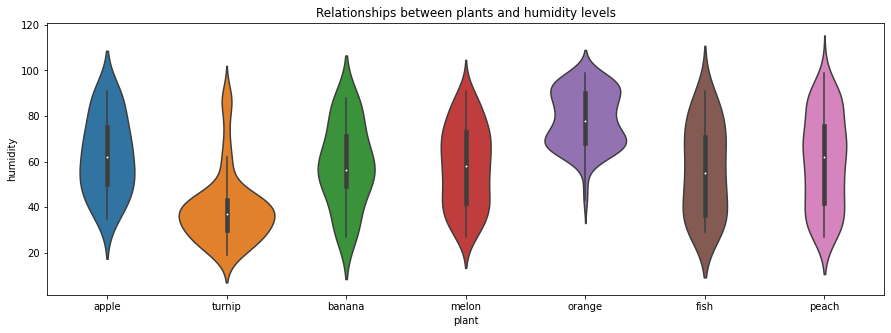

In [11]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.violinplot(x='plant', y='humidity', data=tps1_df)

props = {
    'title': 'Relationships between plants and humidity levels',
}
ax.set(**props)

In the above chart you can see that turnip production begins to decrease sharply around 50%, and that oranges do not seem to grow below 60%. The swarmplot below shows the two outliers in the orange data a little better. 

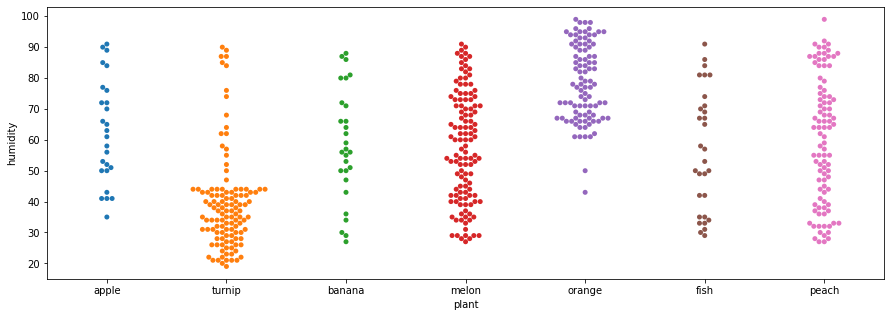

In [12]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='humidity', data=tps1_df)

[Text(0.5, 1.0, 'Relationships between animals and humidity levels')]

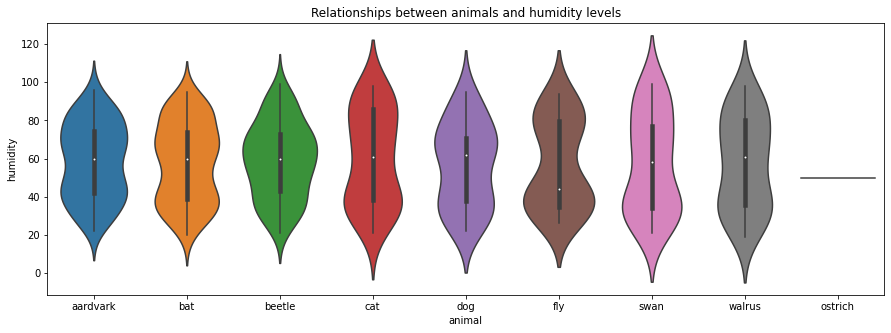

In [13]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.violinplot(x='animal', y='humidity', data=tps1_df)

props = {
    'title': 'Relationships between animals and humidity levels',
}
ax.set(**props)

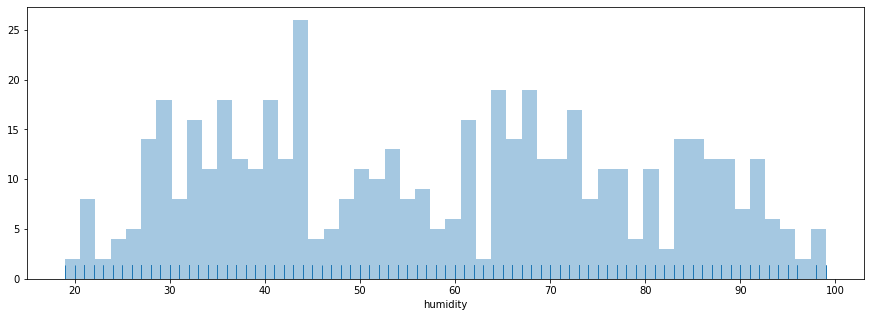

In [14]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.distplot(tps1_df['humidity'], bins=50, kde=False, rug=True)

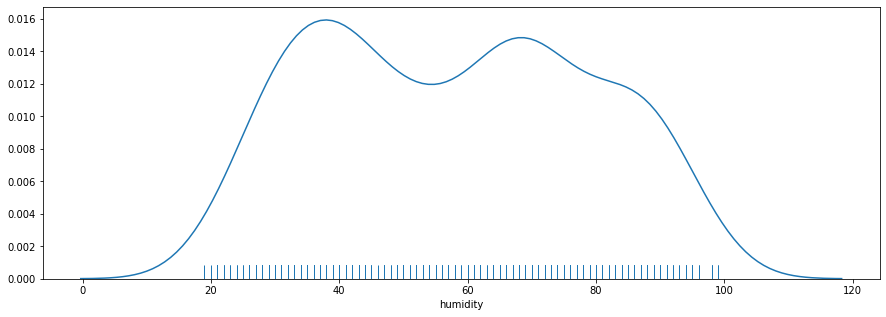

In [15]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.distplot(tps1_df['humidity'], hist=False, rug=True)

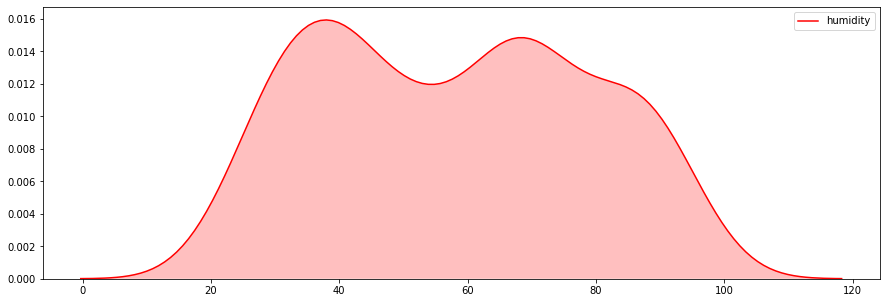

In [16]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.kdeplot(tps1_df['humidity'], shade=True, color='r')

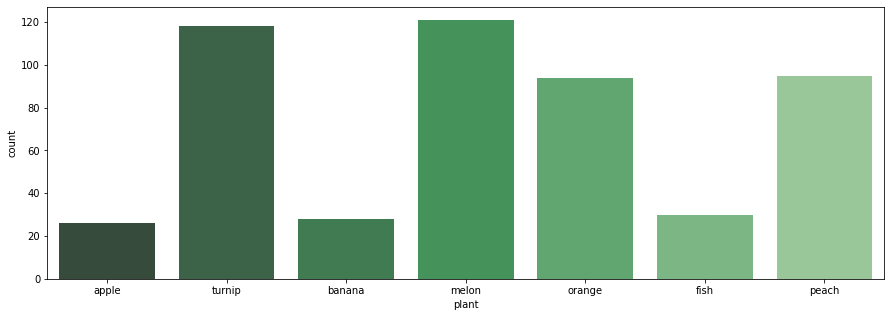

In [17]:
f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='plant', data=tps1_df, palette="Greens_d")

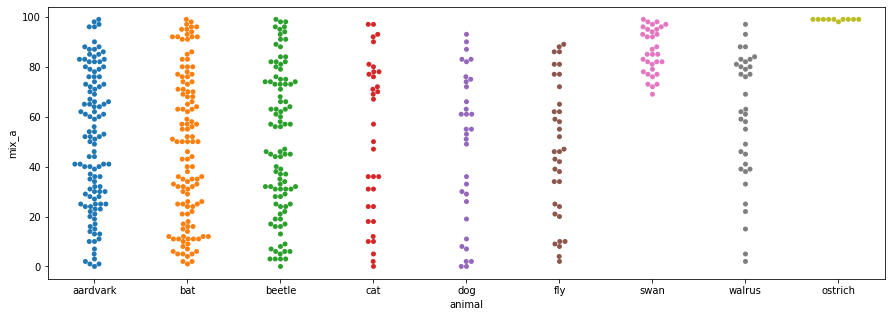

In [18]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='animal', y='mix_a', data=tps1_df)

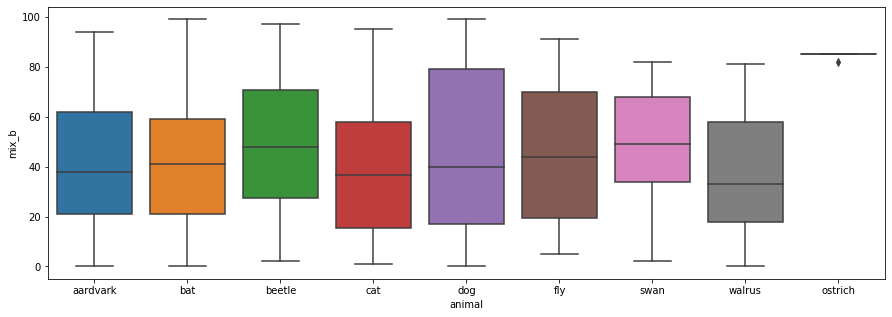

In [19]:
f,ax=plt.subplots(figsize=(15,5))

sns.boxplot(x='animal', y='mix_b', data=tps1_df)

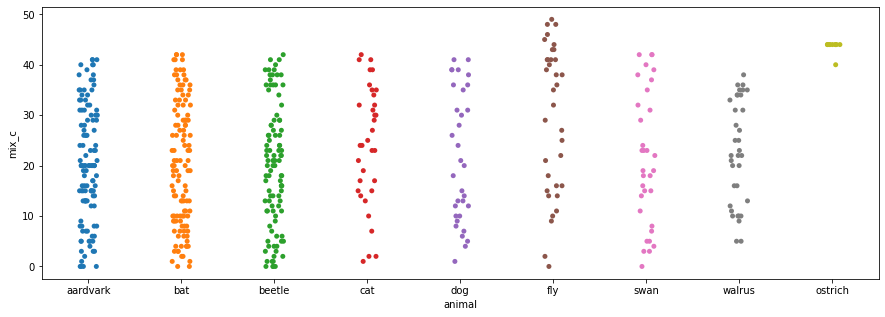

In [20]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='animal', y='mix_c', data=tps1_df, jitter=True)

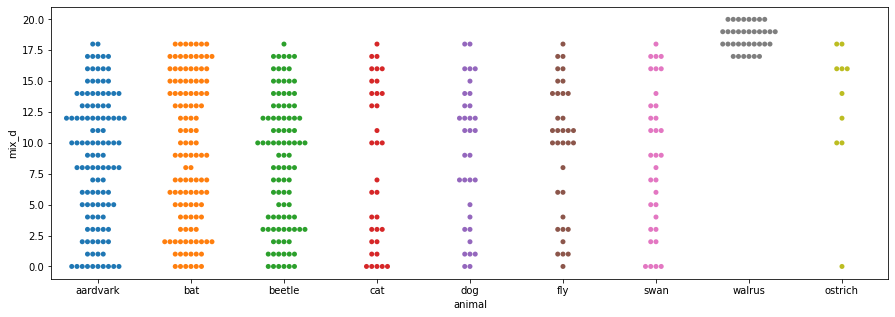

In [21]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='animal', y='mix_d', data=tps1_df)

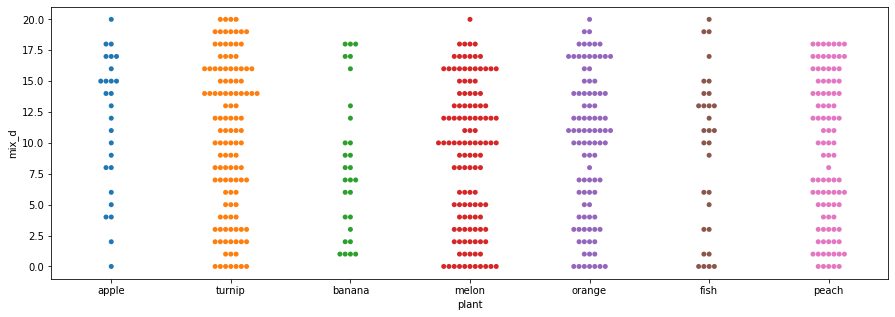

In [22]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_d', data=tps1_df)

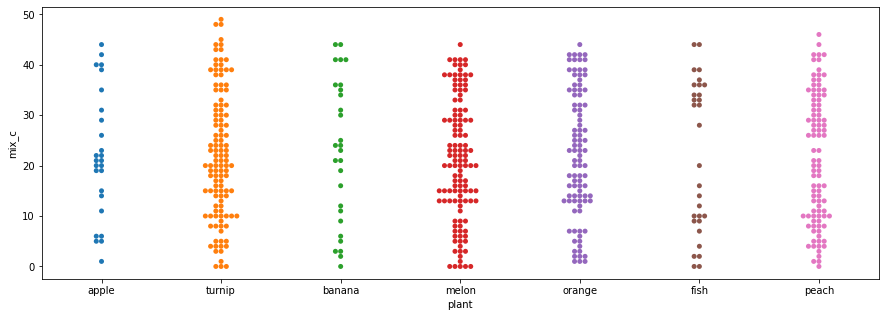

In [23]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_c', data=tps1_df)

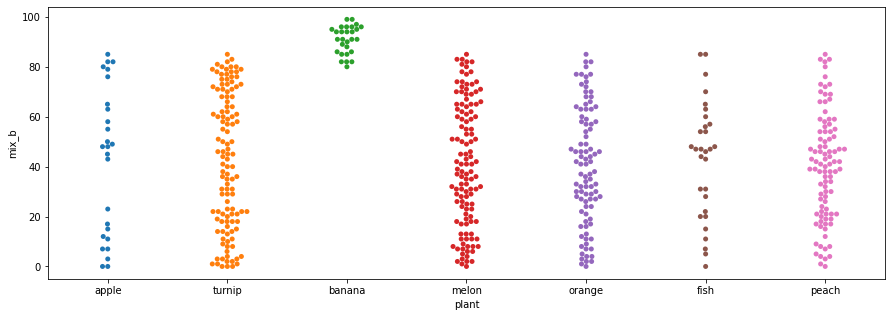

In [24]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df)

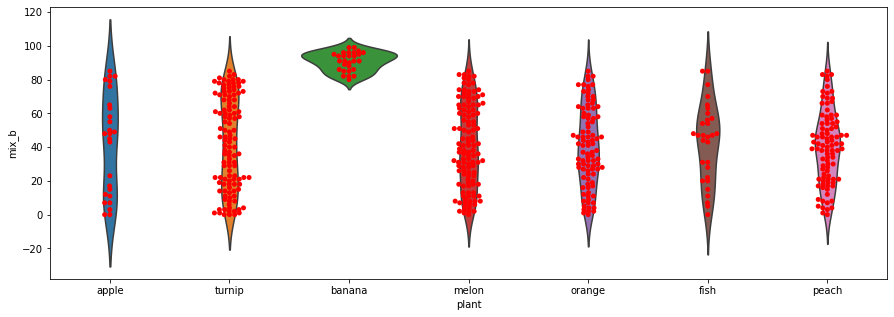

In [25]:
#it appears that banana increases with Mix C, 
#combine the swarm plot points over the area of the violin plot
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df, color='r')
sns.violinplot(x='plant', y='mix_b', data=tps1_df, inner=None)

#sns.swarmplot(x='plant', y='mix_a', data=tps1_df, color='g')
#sns.swarmplot(x='plant', y='mix_c', data=tps1_df, color='b')
#sns.swarmplot(x='plant', y='mix_d', data=tps1_df, color='y')


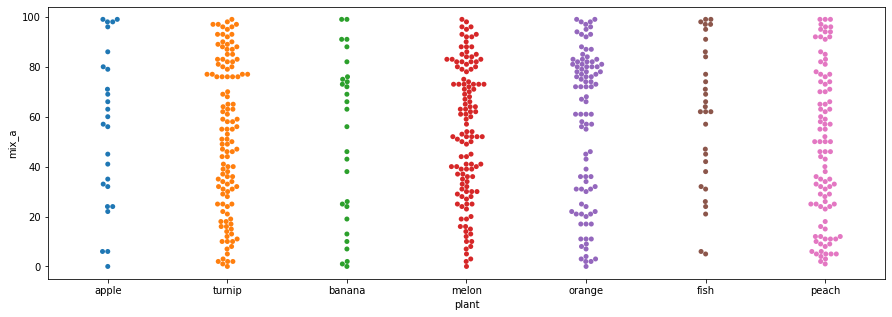

In [26]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_a', data=tps1_df)

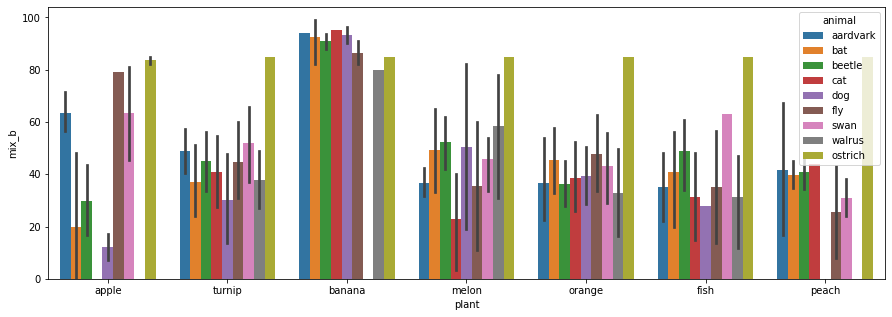

In [27]:
f,ax=plt.subplots(figsize=(15,5))

sns.barplot(x='plant', y='mix_b', data=tps1_df, hue='animal')

###The above graph shows that Mix B increased banana numbers

The bulk of the values for the mix_b column appears to be increasing bananas in some way. 
There is also an ostrich in each 

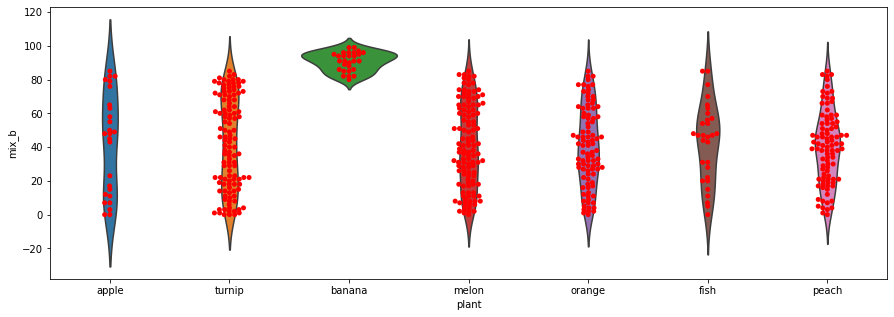

In [28]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df, color='r')
sns.violinplot(x='plant', y='mix_b', data=tps1_df, inner=None) 
#after you perfrom the scaling procedure below, return here. 
#

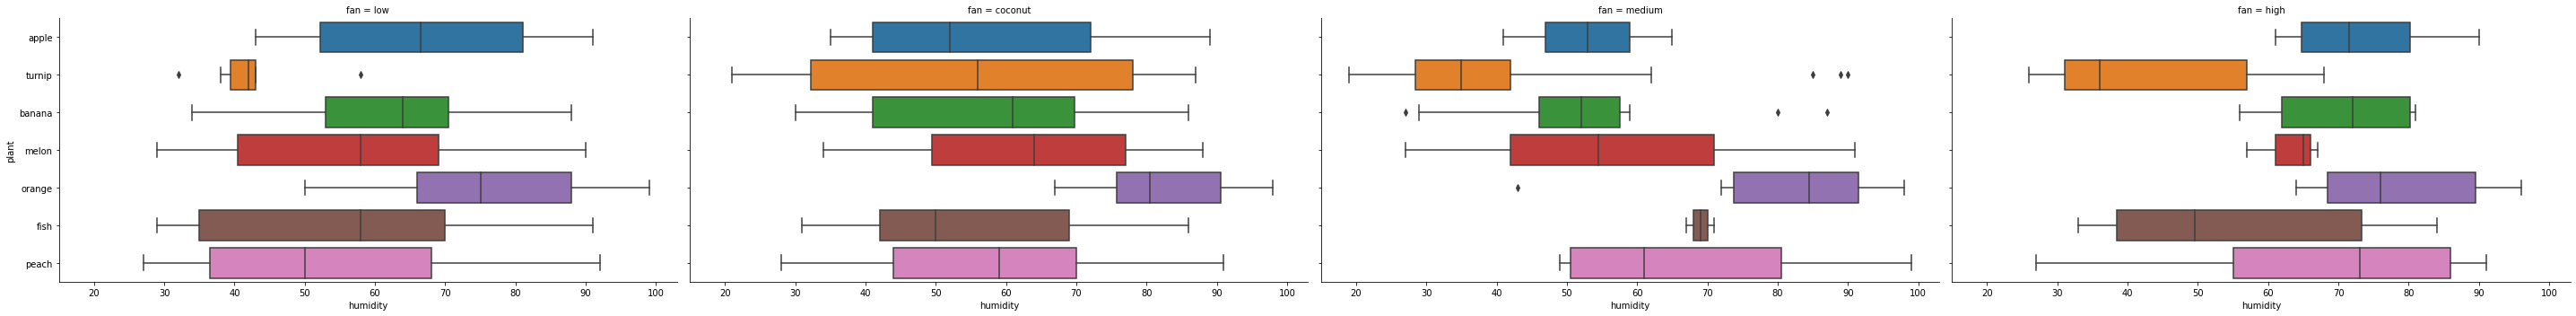

In [29]:
sns.factorplot(x='humidity', y='plant', data=tps1_df, size=5, aspect=2, 
              col="fan", kind="box")
#display the plots sideways stacked

In [ ]:
sns.factorplot(x='mix_b', y='plant', data=tps1_df, size=5, aspect=2, 
              col="fan", kind="swarm")

In [ ]:
sns.factorplot(x='humidity', y='fan', data=tps1_df, size=5, aspect=2, 
              col="plant", kind="box")

### Standardize the Mix values with z-scaling:


Apply scaling on the mix values to express them in relations to each other. 


Z-score is the expression of a value in terms of the number of standard deviations from the mean. 


The effect is to give a score which is relative to the the distribution of values for that column

In [31]:
tps1_z = tps1_df
tps1_z.head()

serial    pod    animal   plant      fan  mix_a  mix_b  mix_c  mix_d  \
0   60429  Pod_0  aardvark   apple      low     71     58     35      8   
1   56805  Pod_0       bat  turnip  coconut     56      0     21      7   
2   60962  Pod_0    beetle  banana   medium      7     94      5      1   
3   46081  Pod_0       cat   melon     high     36      1     24      2   
4   51431  Pod_0       dog  orange   medium     87     28      6     16   

   humidity temperature  voltage  
0        56        cold      3.4  
1        36        cold      3.4  
2        29         hot      3.4  
3        57        cold      3.4  
4        43         hot      3.4

In [32]:
from sklearn import preprocessing

tps1_z[['mix_a']] = preprocessing.scale(tps1_df[['mix_a']])
tps1_z[['mix_b']] = preprocessing.scale(tps1_df[['mix_b']])
tps1_z[['mix_c']] = preprocessing.scale(tps1_df[['mix_c']])
tps1_z[['mix_d']] = preprocessing.scale(tps1_df[['mix_d']])

In [33]:
tps1_z.head()

serial    pod    animal   plant      fan     mix_a     mix_b     mix_c  \
0   60429  Pod_0  aardvark   apple      low  0.605914  0.534352  1.039017   
1   56805  Pod_0       bat  turnip  coconut  0.099337 -1.666803 -0.071250   
2   60962  Pod_0    beetle  banana   medium -1.555482  1.900587 -1.340127   
3   46081  Pod_0       cat   melon     high -0.576099 -1.628852  0.166664   
4   51431  Pod_0       dog  orange   medium  1.146263 -0.604176 -1.260823   

      mix_d  humidity temperature  voltage  
0 -0.278047        56        cold      3.4  
1 -0.447524        36        cold      3.4  
2 -1.464383        29         hot      3.4  
3 -1.294907        57        cold      3.4  
4  1.077765        43         hot      3.4

#### After scaling, calculate the variance of each mix again


When you call the describe function you will see the changes as well.

In [ ]:
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var()))
print('Variance Mix B : {0}'.format(tps1_df.mix_b.var()))
print('Variance Mix C : {0}'.format(tps1_df.mix_c.var()))
print('Variance Mix D : {0}'.format(tps1_df.mix_d.var()))
print('Variance Humidity : {0}'.format(tps1_df.humidity.var()))

In [ ]:
print('Variance Mix A : {0}'.format(tps1_z.mix_a.var()))
print('Variance Mix B : {0}'.format(tps1_z.mix_b.var()))
print('Variance Mix C : {0}'.format(tps1_z.mix_c.var()))
print('Variance Mix D : {0}'.format(tps1_z.mix_d.var()))
print('Variance Humidity : {0}'.format(tps1_z.humidity.var()))

In [ ]:
tps1_df.describe()

In [ ]:
tps1_z.describe()

In [ ]:
tps1_df[tps1_df.isnull().any(axis=1)]

In [ ]:
#save a copy to the interim data folder
tps1_z.to_csv('data/interim/tps1_zscore_mixes.csv')

In [ ]:
!cat data/interim/tps1_zscore_mixes.csv

### Convert voltage & temperature column with **Label Encoding:**


Create a binary representation of the two columns that only contain two unique values.

Voltage values are integers which will be cast as 'dummies', or 

Convert the text values to numbers. These can be used in the following situations:

There are only two values for a column in your data. The values will then become 0/1 - effectively a binary representation

The values have relationship with each other where comparisons are meaningful (e.g. low<medium<high)

In [34]:
le = preprocessing.LabelEncoder()
tps1_z['temperature'] = le.fit_transform(tps1_df['temperature'].astype(str))
tps1_z['voltage'] = le.fit_transform(tps1_df['voltage'].astype(str))

In [35]:
tps1_z.head()

serial    pod    animal   plant      fan     mix_a     mix_b     mix_c  \
0   60429  Pod_0  aardvark   apple      low  0.605914  0.534352  1.039017   
1   56805  Pod_0       bat  turnip  coconut  0.099337 -1.666803 -0.071250   
2   60962  Pod_0    beetle  banana   medium -1.555482  1.900587 -1.340127   
3   46081  Pod_0       cat   melon     high -0.576099 -1.628852  0.166664   
4   51431  Pod_0       dog  orange   medium  1.146263 -0.604176 -1.260823   

      mix_d  humidity  temperature  voltage  
0 -0.278047        56            0        0  
1 -0.447524        36            0        0  
2 -1.464383        29            1        0  
3 -1.294907        57            0        0  
4  1.077765        43            1        0

In [36]:
le.classes_

array(['3.4', '5.1'], dtype=object)

#### Convert animals, plants and fans with One-Hot Encoding:

Find any meaningful comparison between values in columns 'voltage', 'temperature', 'fan', 'plant', 'animal'. This will create 24 new columns of 1's and 0's.

After the conversion there will be no relationship between the word values as in the raw data set.

In [37]:
pd.get_dummies(tps1_z['voltage'])
pd.get_dummies(tps1_z['temperature'])

0  1
0    1  0
1    1  0
2    0  1
3    1  0
4    0  1
..  .. ..
507  0  1
508  1  0
509  0  1
510  1  0
511  1  0

[512 rows x 2 columns]

#### Add the dummy columns to the data frame

In [38]:
tps1_z = pd.get_dummies(tps1_z, columns=['voltage'])
tps1_z = pd.get_dummies(tps1_z, columns=['temperature'])

In [39]:
print(tps1_df.head())
#if succesful, the serial and humidity columns should remain unchanged
print(tps1_z.head())

   serial    pod    animal   plant      fan     mix_a     mix_b     mix_c  \
0   60429  Pod_0  aardvark   apple      low  0.605914  0.534352  1.039017   
1   56805  Pod_0       bat  turnip  coconut  0.099337 -1.666803 -0.071250   
2   60962  Pod_0    beetle  banana   medium -1.555482  1.900587 -1.340127   
3   46081  Pod_0       cat   melon     high -0.576099 -1.628852  0.166664   
4   51431  Pod_0       dog  orange   medium  1.146263 -0.604176 -1.260823   

      mix_d  humidity  temperature  voltage  
0 -0.278047        56            0        0  
1 -0.447524        36            0        0  
2 -1.464383        29            1        0  
3 -1.294907        57            0        0  
4  1.077765        43            1        0  
   serial    pod    animal   plant      fan     mix_a     mix_b     mix_c  \
0   60429  Pod_0  aardvark   apple      low  0.605914  0.534352  1.039017   
1   56805  Pod_0       bat  turnip  coconut  0.099337 -1.666803 -0.071250   
2   60962  Pod_0    beetle  ba

#### Apply one-hot-encoding for remaining non-numeric features

In [40]:
tps1_z = pd.get_dummies(tps1_z, columns=['animal', 
                                               'plant', 
                                               'fan',
                                               'pod'])

In [ ]:
#save a copy to the processed data folder
tps1_z.to_csv('data/processed/tps1_encoded.csv')

####Find relationships between the mixes, plants, animals and pods
tps1_z.head()

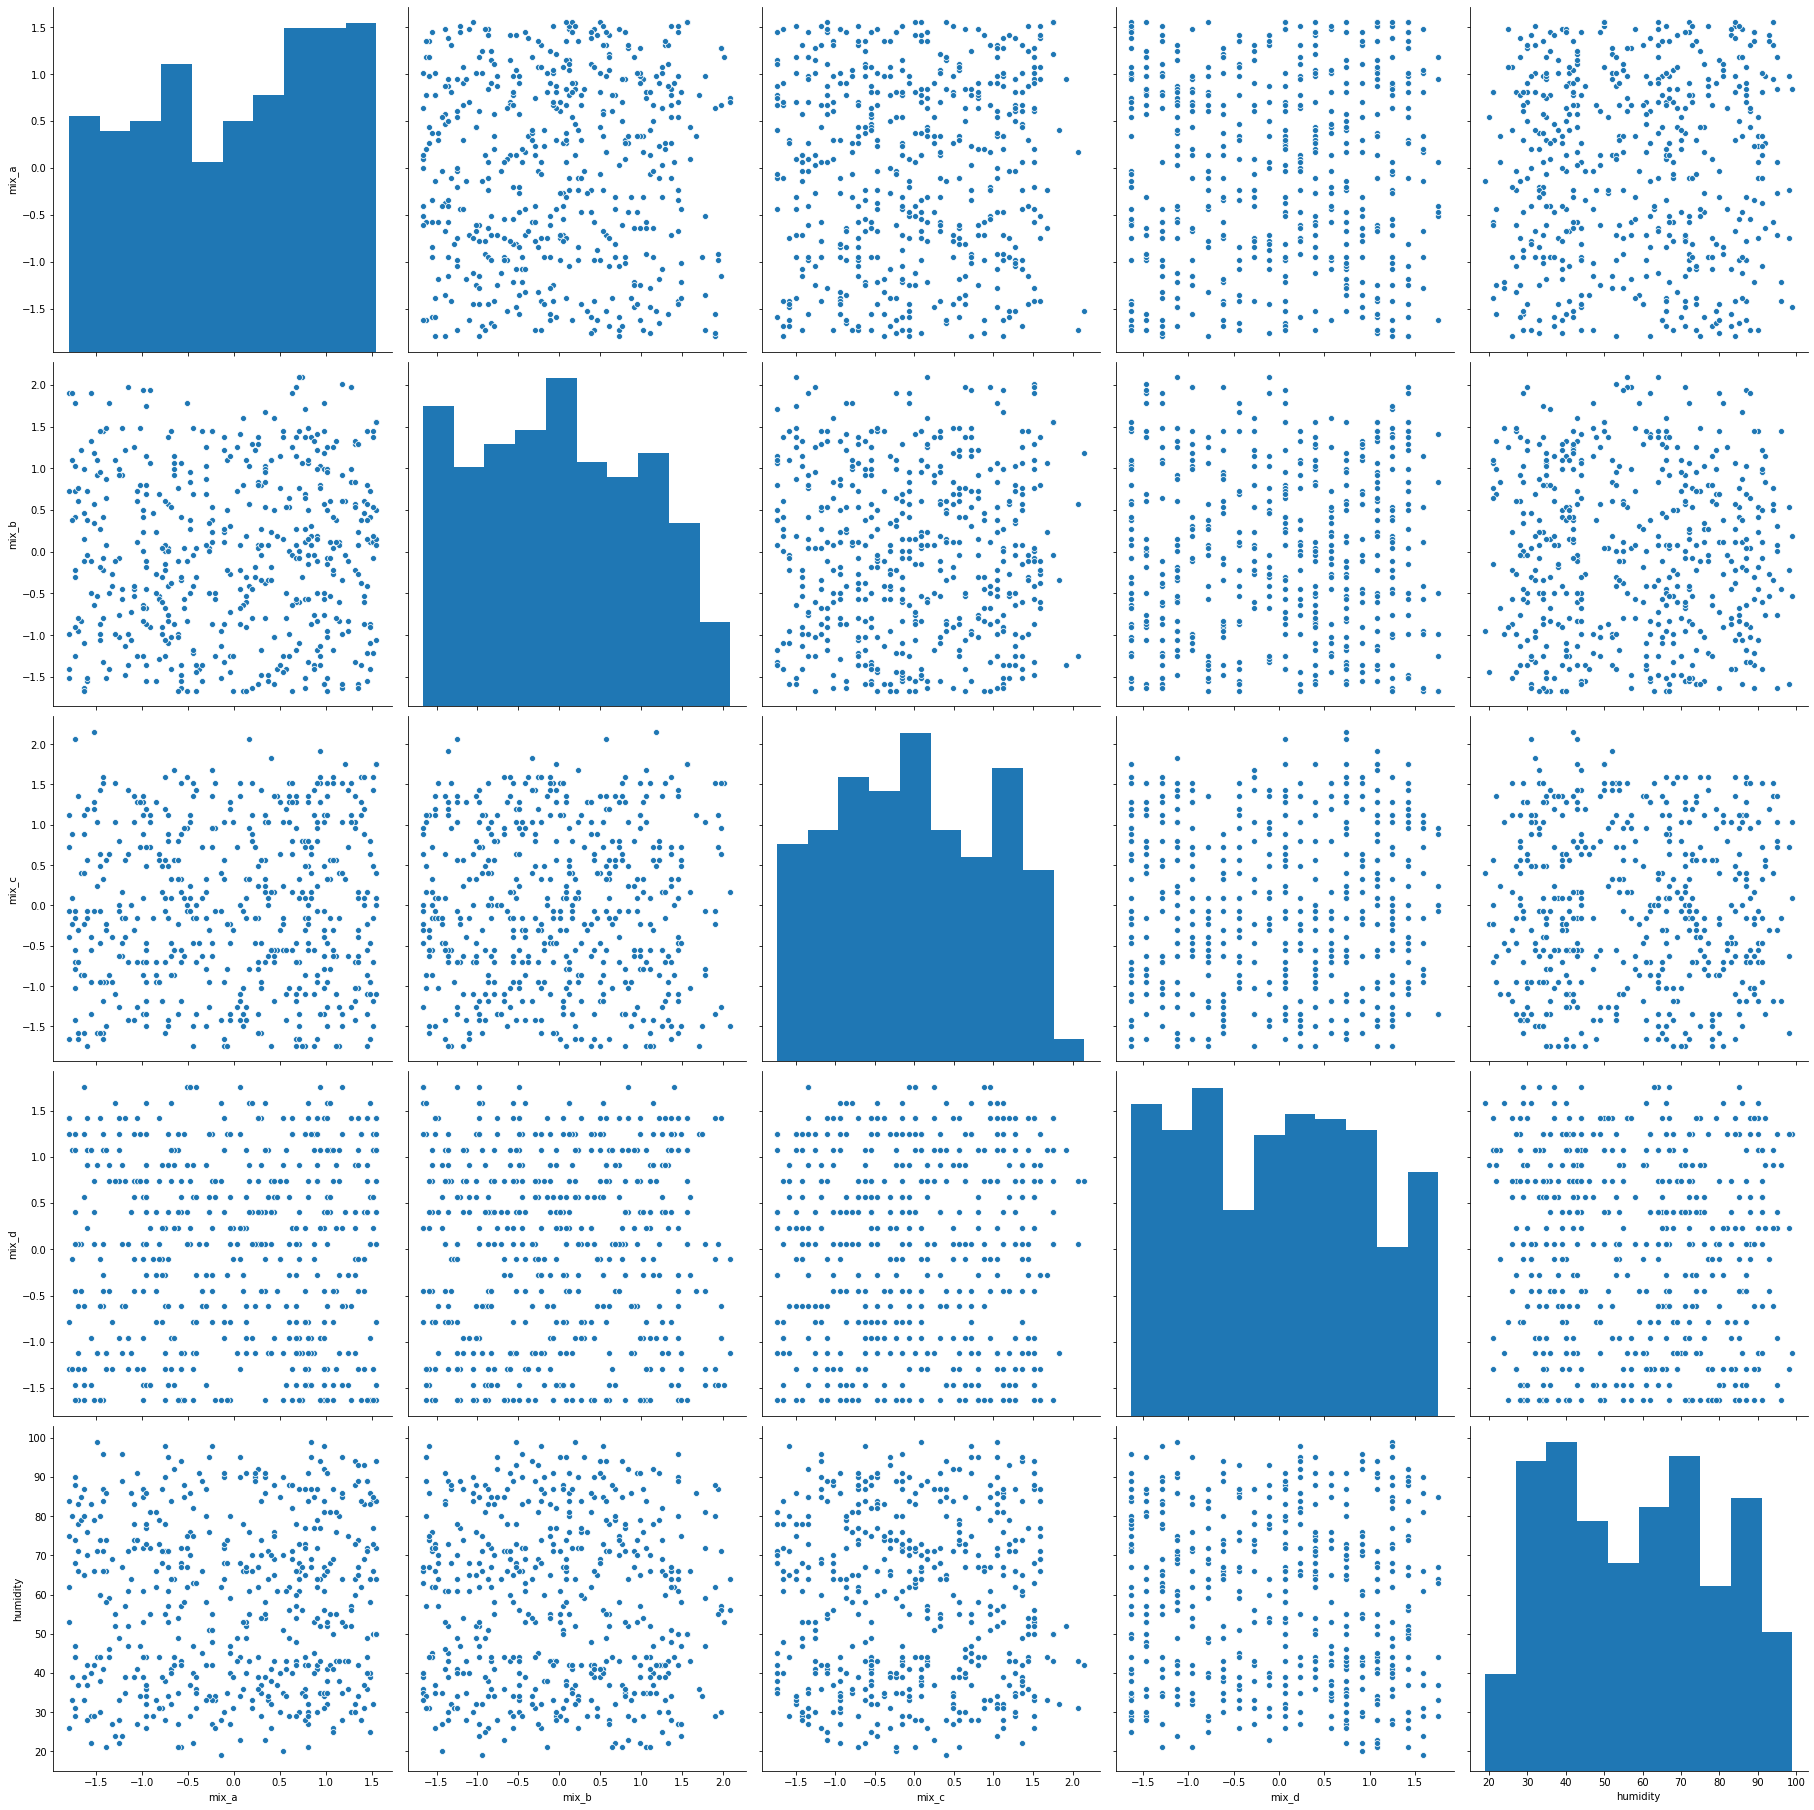

In [41]:
sns.pairplot(tps1_z, size=5,
            vars=["mix_a", "mix_b", "mix_c", "mix_d", "humidity"])

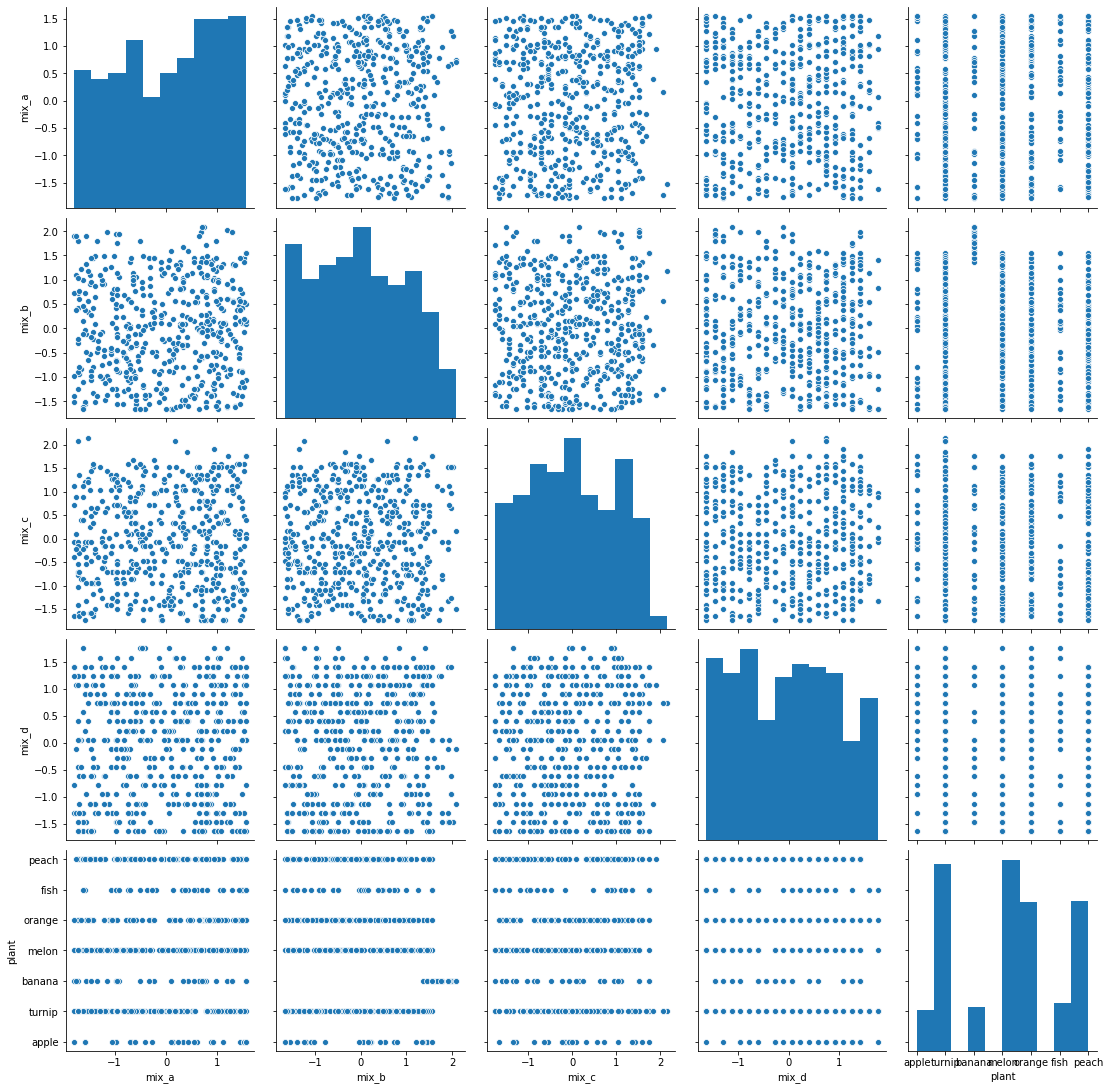

In [42]:
sns.pairplot(tps1_df, size=3,
            vars=["mix_a", "mix_b", "mix_c", "mix_d", "plant"])

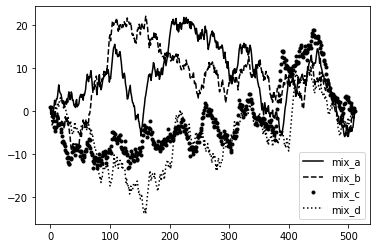

In [43]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(tps1_z.mix_a.cumsum(), 'k', label='mix_a')
ax.plot(tps1_z.mix_b.cumsum(), 'k--', label='mix_b')
ax.plot(tps1_z.mix_c.cumsum(), 'k.', label='mix_c')
ax.plot(tps1_z.mix_d.cumsum(), 'k:', label='mix_d')
ax.legend(loc='best')

In [44]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=5000)
analyzer.fit(tps1_z)

MeanShift(bandwidth=5000, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [45]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(tps1_z)

17147.340321224274

In [46]:
labels = analyzer.labels_

In [47]:
#import numpy as np
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [48]:
import numpy as np

tps1_df['cluster_group'] = np.nan
data_length = len(tps1_df)
for i in range(data_length):
    tps1_df.iloc[i, tps1_df.columns.get_loc('cluster_group')] = labels[i]

In [49]:
tps1_df.head()

serial    pod    animal   plant      fan     mix_a     mix_b     mix_c  \
0   60429  Pod_0  aardvark   apple      low  0.605914  0.534352  1.039017   
1   56805  Pod_0       bat  turnip  coconut  0.099337 -1.666803 -0.071250   
2   60962  Pod_0    beetle  banana   medium -1.555482  1.900587 -1.340127   
3   46081  Pod_0       cat   melon     high -0.576099 -1.628852  0.166664   
4   51431  Pod_0       dog  orange   medium  1.146263 -0.604176 -1.260823   

      mix_d  humidity  temperature  voltage  cluster_group  
0 -0.278047        56            0        0            3.0  
1 -0.447524        36            0        0            0.0  
2 -1.464383        29            1        0            3.0  
3 -1.294907        57            0        0            6.0  
4  1.077765        43            1        0            0.0

In [ ]:
tps1_z.describe()

In [ ]:
tps1_cluster_data = tps1_z.groupby(['cluster_group']).mean()
tps1_cluster_data

In [ ]:
tps1_cluster_data['Counts'] = pd.Series(tps1_df.groupby(['cluster_group']).size())
tps1_cluster_data
#add a column with the 

In [ ]:
tps1_df[tps1_df['cluster_group'] == 1].describe()

In [ ]:
tps1_df[tps1_df['cluster_group'] == 11]

In [8]:
tps1_df['animal'].unique()

array(['aardvark', 'bat', 'beetle', 'cat', 'dog', 'fly', 'swan', 'walrus',
       'ostrich'], dtype=object)